# Multiple Linear Regression
The multiple linear regression explains the relationship between one continuous dependent variable (y) and two or more independent variables (x1, x2, x3… etc).

## Methods used in this notebook
1. Sci-kit Learn
2. Backward Selection
3. Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv("datasets/50-startups.csv")

## Step 1 - Understanding the data

In [3]:
data.shape

(50, 5)

In [4]:
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
# Dropping the column with non numeric value as it does not have a lot of relevence for this dataset
data = data.drop('State',axis=1)

In [7]:
data.head(5)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Step 2 - Visualising the data

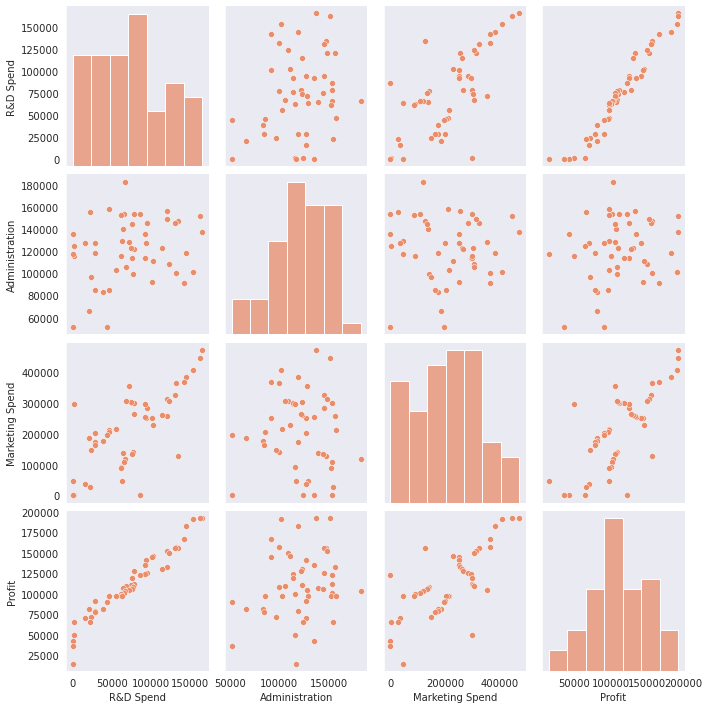

In [9]:
sb.set_style("dark")
sb.set_palette("flare")
sb.pairplot(data)

[]

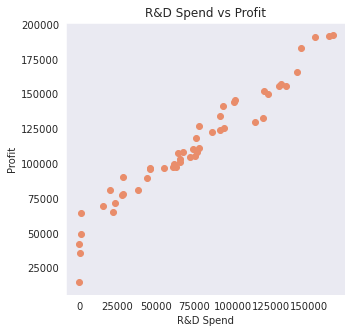

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(data=data,x='R&D Spend',y='Profit')
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.plot()

[]

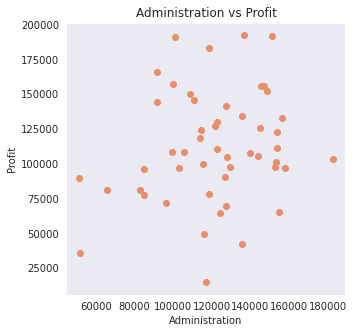

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(data=data,x='Administration',y='Profit')
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.plot()

[]

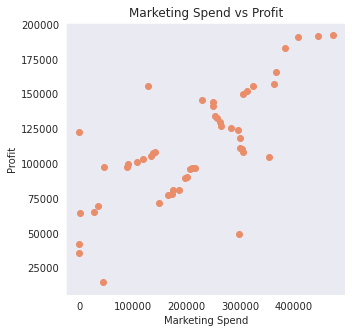

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(data=data,x='Marketing Spend',y='Profit')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.plot()

### Pearson correlation coefficient
The Pearson correlation coefficient (r) is a measurement of the amount of linear correlation between equal length arrays which outputs a value ranging -1 to 1. Correlation values ranging from 0 to 1 represent increasingly strong positive correlation.

Correlation Value	Interpretation
* 0.8 - 1.0 => Very Strong
* 0.6 - 0.8 => Strong
* 0.4 - 0.6 => Moderate
* 0.2 - 0.4 => Weak
* 0.0 - 0.2 => Very Weak

In [13]:
data.corr()[['Profit']].sort_values('Profit')

,Profit
Administration,0.200717
Marketing Spend,0.747766
R&D Spend,0.972900
Profit,1.000000


From the Pearson Correaltion Coefficient and plotting the graph for each attribute we can see that the following can be seen having a good positive linear relationship with price : 
1. Marketing Spend
2. R&D Spend

So these will be the attributes being used in fitting the Linear Regression Model.

In [14]:
X = data[['Marketing Spend', 'R&D Spend']]
y = data[['Profit']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [16]:
X_train.shape

(40, 2)

## Step 3(I) - MLR using Sci-kit Learn

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Loading the model 
model = LinearRegression()

# Fitting the model 
model.fit(X_train,y_train)

LinearRegression()

### Cheking model performance
Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. We will see the value of the intercept and slop calculated by the linear regression algorithm for our dataset.

In [19]:
print(model.intercept_)

[46346.33876124]


For retrieving the slope (coefficient of x).

In [20]:
print(model.coef_)

[[0.03257663 0.7886183 ]]


### Making Predictions

In [21]:
y_pred4 = pd.DataFrame(model.predict(X_test))

In [22]:
y_pred4 = np.array(y_pred4)
y_actual4 = np.array(y_test)

In [23]:
predictions4 = pd.DataFrame({"Actual" : list(y_actual4), "Predicted" : list(y_pred4)})

In [24]:
predictions4.head(5)

,Actual,Predicted
0,[103282.38],[102284.6460518289]
1,[144259.4],[133873.92383811905]
2,[146121.95],[134182.149516501]
3,[77798.83],[73701.10693630345]
4,[191050.39],[180642.25299736092]


### Evaluating the model

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

Mean Absolute Error: 6886.594588246505
Mean Squared Error: 67220275.37568131
Root Mean Squared Error: 8198.797190788495


### Finding goodness of fit

In [26]:
print('R-squared Score:',metrics.r2_score(y_test, y_pred4))

R-squared Score: 0.9474386447268488


## Step 3(II) - MLR using Backward Selection
Start with all variables. Try model out multiple times, excluding one variable at each time. Remove variable that causes the model to improve the most when it is left out. Repeat process without the removed variable, until the metric(s) you are judging on can no longer improve.

In [27]:
import statsmodels.api as sm

### Load & Split Dataset

In [28]:
data2 = pd.read_csv("datasets/50-startups.csv")

In [29]:
X_bw = data2.iloc[:, :3].values
y_bw = data2.iloc[:, 4].values

In [30]:
X_bw_train, X_bw_test, y_bw_train, y_bw_test = train_test_split( X_bw, y_bw, test_size=0.2, random_state=0)

The multiple linear regression equation is given by $ y = b_0 + b_1x_1 + b_2x_2 + ... + b_ix_i$

Hence, we need to add a column at the 0th position so we can get the reqired shape for the X array.

In [31]:
X_bw = np.append(arr = np.ones((50,1)).astype(int), values = X_bw, axis=1) 

### Finding optimal variables

In [32]:
X_opt = X_bw[:, [0,1,2,3]]
regressor_OLS = sm.OLS(endog = y_bw, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           4.53e-30
Time:                        00:18:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As x5 shows highest p-value, we will be removing that in next iteration, and will continue to do the same for all steps. 

In [33]:
X_opt= X_bw[:, [0,1,3]] 
regressor_OLS=sm.OLS(endog = y_bw, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           2.16e-31
Time:                        00:18:06   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X_opt= X_bw[:, [0,3]] 
regressor_OLS=sm.OLS(endog = y_bw, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           4.38e-10
Time:                        00:18:06   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
x1             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**From this we can conclude that the highest impact variable is R&D spendings on profit of these startups.**

## Step 3(III) - MLR using Gradient Descent Algorithm
Gradient Descent is an optimization algorithm that is used to find the optimal values for the collection of model parameters for any regression model.

In [35]:
from sklearn.datasets import load_boston

### Loading dataset

In [36]:
boston = load_boston()

X3 = boston.data
y3 = boston.target

In [37]:
print(X3.shape)
print(y3.shape)

(506, 13)
(506,)


In [38]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [39]:
df = pd.DataFrame(X3)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Normalize X

In [41]:
u = np.mean(X3,axis=0)
std = np.std(X3,axis=0)

In [42]:
X3 = (X3-u)/std

In [43]:
pd.DataFrame(X3[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [44]:
# Adding column for b0
ones = np.ones((X3.shape[0],1))
X3 = np.hstack((ones,X3))
print(X3.shape)

(506, 14)


In [45]:
X3_train, X3_test, y3_train, y3_test = train_test_split( X3, y3, test_size=0.2, random_state=0)

### Defining the necessary equations

The equation is : $\bar y = \theta_0 + \theta_1x_1 + ... + \theta_mx_m$

In [46]:
def hypothesis(X,theta):
    return np.dot(X,theta)

The error is : $e = \frac{1}{n}\sum_1^n(y - \bar y)^2$

The cost function is : $\frac {1}{2m}\sum_1^m(h_0(x - y))^2$

In [47]:
def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)

The gradient is : $grad = X^T.(\bar y - y)$ 

In [48]:
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y)) 
    m = X.shape[0]
    return grad/m

Gradient descent steps : (We need to move the values of weights in the direction in which SSE is minimized.)
1. Calculate the gradient i.e. change in SSE when the weights are changed by a very small value from their original randomly initialized value. 
2. Adjust the weights with the gradients to reach the optimal values where SSE is minimized.
3. Use the new weights for prediction and to calculate the new SSE.
4. Repeat steps 2 and 3 till further adjustments to weights doesn’t significantly reduce the Error.

In [49]:
def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

### Fitting the model

In [50]:
theta,error_list = gradient_descent(X3_train,y3_train)

In [51]:
theta

array([22.48524715, -1.00462801,  1.01004594, -0.06217604,  0.60811252,
       -1.81790531,  2.62673575, -0.10862026, -2.90346149,  1.87700749,
       -1.58831582, -2.2474297 ,  0.73597592, -3.5048914 ])

### Predictions

In [52]:
y_pred = []
m = X3_test.shape[0]

for i in range(m):
    pred = hypothesis(X3_test[i],theta)
    y_pred.append(pred)
y_pred = np.array(y_pred)

### Finding Goodness of Fit

In [53]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [54]:
r2_score(y3_test,y_pred)

58.70574521070492